# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [30]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [40]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_temp_max = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_temp_max,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sinabang
Processing Record 2 of Set 1 | port mathurin
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | coahuayana de hidalgo
Processing Record 5 of Set 1 | settat
Processing Record 6 of Set 1 | papatowai
Processing Record 7 of Set 1 | saldanha
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | kudahuvadhoo
Processing Record 10 of Set 1 | tolanaro
Processing Record 11 of Set 1 | at taj
Processing Record 12 of Set 1 | victoria
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | fort dodge
Processing Record 15 of Set 1 | saratamata
City not found. Skipping...
Processing Record 16 of Set 1 | castillos
Processing Record 17 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 18 of Set 1 | hamilton
Processing Record 19 of Set 1 | calimanesti
Processing Record 20 of Set 1 | tarauaca
Processing Record 21 of Set 1 | ushuaia
Proces

Processing Record 37 of Set 4 | inekar
City not found. Skipping...
Processing Record 38 of Set 4 | devinuwara
City not found. Skipping...
Processing Record 39 of Set 4 | i-n-salah
Processing Record 40 of Set 4 | nova sintra
Processing Record 41 of Set 4 | aoulef
Processing Record 42 of Set 4 | queenstown
Processing Record 43 of Set 4 | wewak
Processing Record 44 of Set 4 | xilin hot
Processing Record 45 of Set 4 | nemuro
Processing Record 46 of Set 4 | salta
Processing Record 47 of Set 4 | fortuna
Processing Record 48 of Set 4 | mount pearl
Processing Record 49 of Set 4 | saudarkrokur
Processing Record 0 of Set 5 | anadyr
Processing Record 1 of Set 5 | bejubang dua
City not found. Skipping...
Processing Record 2 of Set 5 | margate
Processing Record 3 of Set 5 | la sarre
Processing Record 4 of Set 5 | turan
Processing Record 5 of Set 5 | funafuti
Processing Record 6 of Set 5 | port elizabeth
Processing Record 7 of Set 5 | page
Processing Record 8 of Set 5 | ataq
Processing Record 9 of S

Processing Record 29 of Set 8 | inarajan village
Processing Record 30 of Set 8 | bodaybo
Processing Record 31 of Set 8 | bamboo flat
Processing Record 32 of Set 8 | qal'ah-ye shahr
Processing Record 33 of Set 8 | zanjan
Processing Record 34 of Set 8 | clearwater
Processing Record 35 of Set 8 | szczecin
Processing Record 36 of Set 8 | patra
Processing Record 37 of Set 8 | santa rosa
Processing Record 38 of Set 8 | la gi
Processing Record 39 of Set 8 | kamina
Processing Record 40 of Set 8 | kouango
Processing Record 41 of Set 8 | new norfolk
Processing Record 42 of Set 8 | honefoss
Processing Record 43 of Set 8 | luganville
Processing Record 44 of Set 8 | vizinga
Processing Record 45 of Set 8 | al jawf
Processing Record 46 of Set 8 | shalqar
Processing Record 47 of Set 8 | ta`u
Processing Record 48 of Set 8 | trinidad
Processing Record 49 of Set 8 | guanica
Processing Record 0 of Set 9 | annaba
Processing Record 1 of Set 9 | hayma'
City not found. Skipping...
Processing Record 2 of Set 9

Processing Record 20 of Set 12 | porto novo
Processing Record 21 of Set 12 | byron bay
Processing Record 22 of Set 12 | cable beach
City not found. Skipping...
Processing Record 23 of Set 12 | baiti
Processing Record 24 of Set 12 | kolobrzeg
Processing Record 25 of Set 12 | southlake
Processing Record 26 of Set 12 | guerrero negro
Processing Record 27 of Set 12 | auki
Processing Record 28 of Set 12 | morondava
Processing Record 29 of Set 12 | sao felix do xingu
Processing Record 30 of Set 12 | ghanzi
Processing Record 31 of Set 12 | nyurba
Processing Record 32 of Set 12 | kirakira
Processing Record 33 of Set 12 | san fernando
Processing Record 34 of Set 12 | kochenevo
Processing Record 35 of Set 12 | monteagudo
Processing Record 36 of Set 12 | mhamid
Processing Record 37 of Set 12 | dauphin
Processing Record 38 of Set 12 | boa vista
Processing Record 39 of Set 12 | strezhevoy
Processing Record 40 of Set 12 | novyy urgal
Processing Record 41 of Set 12 | qujing
Processing Record 42 of Se

In [41]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [42]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sinabang,2.4803,96.3801,26.66,80,68,0.52,ID,1707258488
1,port mathurin,-19.6833,63.4167,26.86,71,61,7.67,MU,1707258488
2,waitangi,-43.9535,-176.5597,19.34,89,98,2.68,NZ,1707258489
3,coahuayana de hidalgo,18.7000,-103.6583,29.99,55,2,3.18,MX,1707258489
4,settat,33.0007,-7.6204,11.90,74,0,3.16,MA,1707258489


In [43]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [44]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sinabang,2.4803,96.3801,26.66,80,68,0.52,ID,1707258488
1,port mathurin,-19.6833,63.4167,26.86,71,61,7.67,MU,1707258488
2,waitangi,-43.9535,-176.5597,19.34,89,98,2.68,NZ,1707258489
3,coahuayana de hidalgo,18.7000,-103.6583,29.99,55,2,3.18,MX,1707258489
4,settat,33.0007,-7.6204,11.90,74,0,3.16,MA,1707258489


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

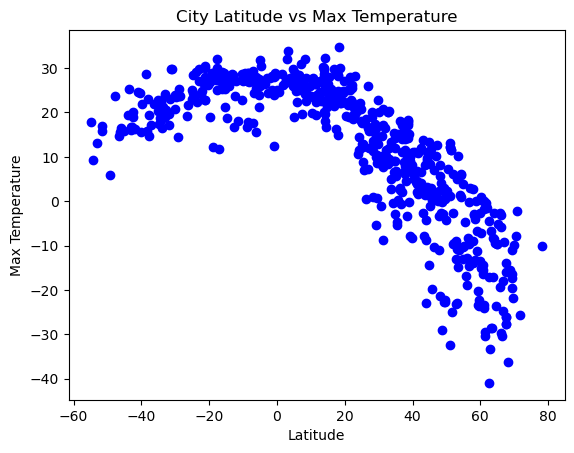

In [47]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker= "o", color = "blue")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude vs Max Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

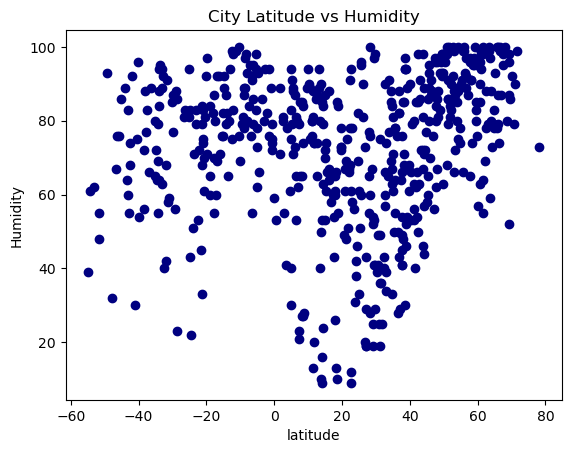

In [50]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", color= "navy")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs Humidity")
plt.xlabel("latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

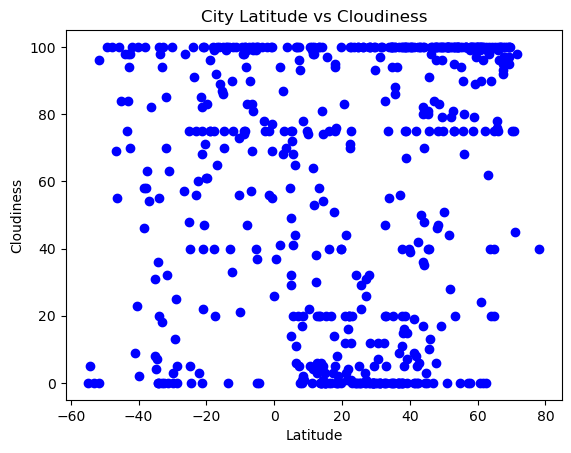

In [53]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o", color= "blue")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

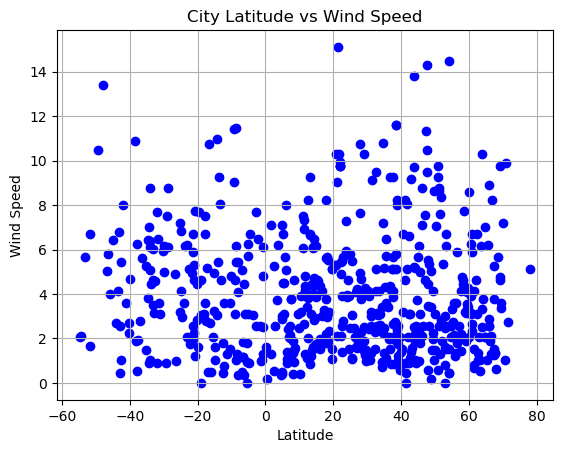

In [55]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o", color= "blue")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [71]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def linear_regress(x, y, eqn_coordinates):
    #r = st.pearsonr(x, y)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")
    print(f"The r-value is: {rvalue}")

In [68]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sinabang,2.4803,96.3801,26.66,80,68,0.52,ID,1707258488
3,coahuayana de hidalgo,18.7000,-103.6583,29.99,55,2,3.18,MX,1707258489
4,settat,33.0007,-7.6204,11.90,74,0,3.16,MA,1707258489
8,kudahuvadhoo,2.6708,72.8944,27.48,81,87,5.26,MV,1707258490
10,at taj,24.2049,23.2857,11.60,38,32,3.86,LY,1707258490


In [69]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port mathurin,-19.6833,63.4167,26.86,71,61,7.67,MU,1707258488
2,waitangi,-43.9535,-176.5597,19.34,89,98,2.68,NZ,1707258489
5,papatowai,-46.5619,169.4708,14.60,67,69,5.03,NZ,1707258489
6,saldanha,-33.0117,17.9442,19.03,94,18,3.49,ZA,1707258291
7,grytviken,-54.2811,-36.5092,9.30,61,5,2.10,GS,1707258490


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.869510176661241


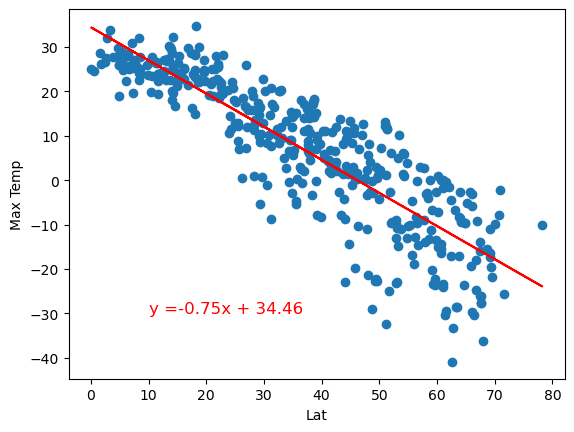

In [72]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
linear_regress(x, y, (10,-30))

The r-value is: 0.5727127949370561


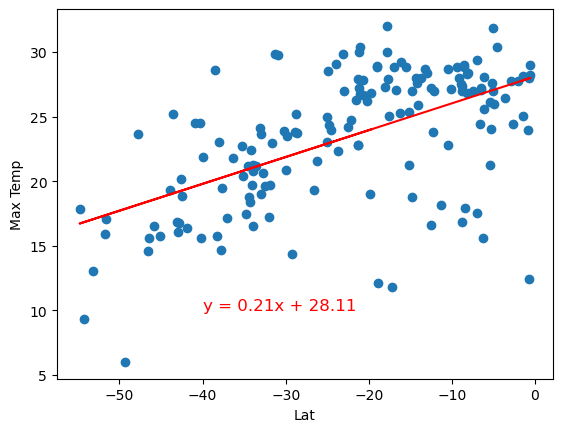

In [74]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
linear_regress(x, y, (-40,10))

**Discussion about the linear relationship:** There is quite a strong negative correlation between Latitude and Max temp in the Northern Hemisphere, and there is a slight positive correlation between latitude and Max temp in the southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.41709287086927765


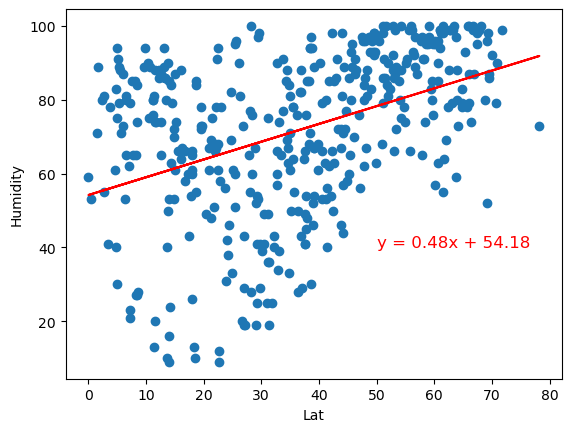

In [76]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
linear_regress(x, y, (50, 40))

The r-value is: 0.3510682053881619


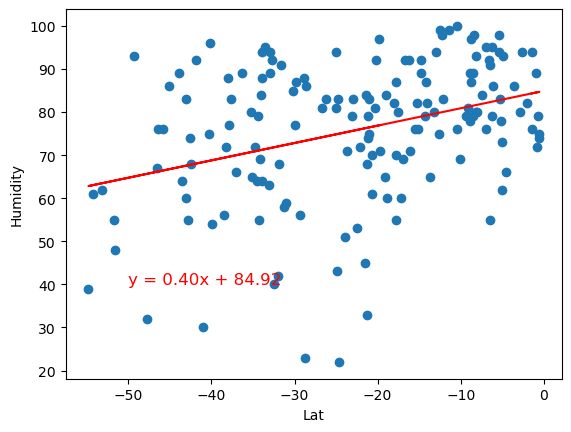

In [77]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
linear_regress(x, y, (-50, 40))

**Discussion about the linear relationship:** Both Hemispheres show a medium positive correlation between Latitude and Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.38982069454933893


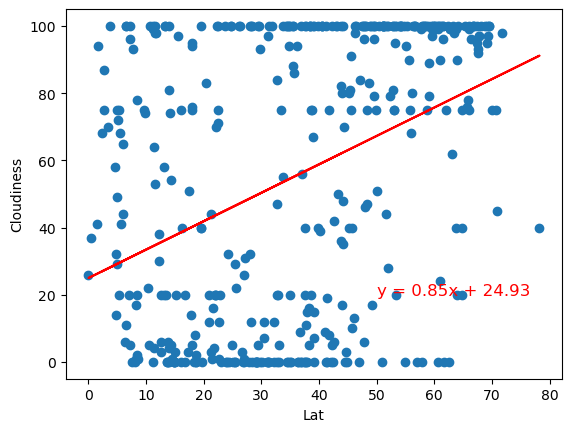

In [78]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
linear_regress(x, y, (50, 20))

The r-value is: 0.2905798874176738


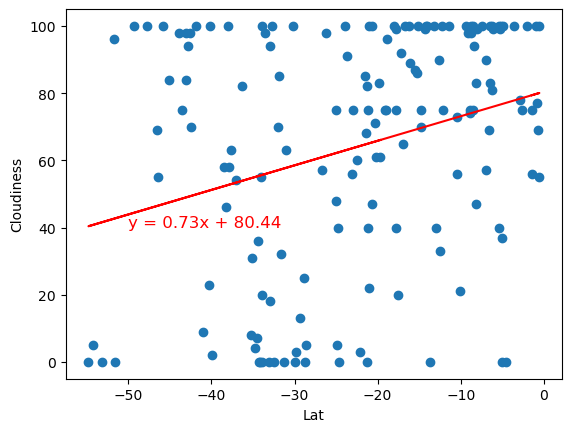

In [79]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
linear_regress(x, y, (-50, 40))

**Discussion about the linear relationship:** Both Hemispheres show a strong positive correlation between Latitude and Cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.015018876243703598


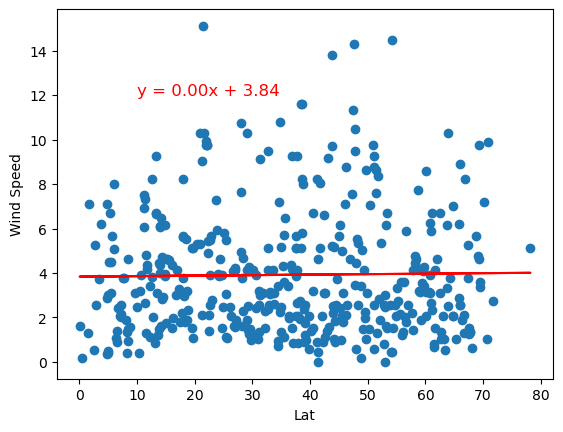

In [81]:
# Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
linear_regress(x, y, (10, 12))

The r-value is: -0.16180540526554493


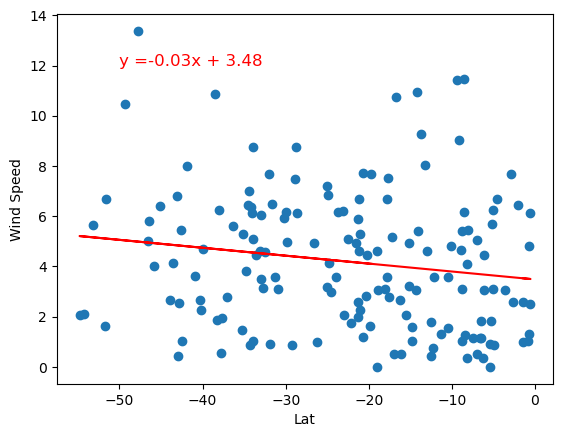

In [82]:
# Southern Hemisphere
# YOUR CODE HERE
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
linear_regress(x, y, (-50, 12))

**Discussion about the linear relationship:** The Northern Hemisphere shows NO Correaltion between Latitude and Windspeed, the Southern Hemisphere shows ALMOST NO Correlation between Latitude and Windspeed.